# Back Propagation XNOR gate

In [1]:
from math import exp
from random import seed
from random import random
import matplotlib.pyplot as plt

This below function will initialise the weights of the network

In [2]:
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(hidden_layer)
    network.append(output_layer)
    return network

### Sigmoid function

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + exp(-z))

### Forward Propagation

In [4]:
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            weights = neuron['weights']
            activation = weights[-1]
            for i in range(len(weights)-1):
                activation += weights[i] * inputs[i]

            neuron['output'] = sigmoid(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

### Backward Propagation

In [5]:
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])

        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * neuron['output'] * (1.0 - neuron['output'])

### Weights Update

In [6]:
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

### Train the network

In [7]:
def train_network(network, train, l_rate, n_epoch, n_outputs):
    errors = []
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        errors.append(sum_error)
#         print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    plt.plot(errors, color='b', label='Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Epoch Vs. Error for XNOR gate')
    plt.legend()
    plt.show()

### Testing

In [8]:
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))


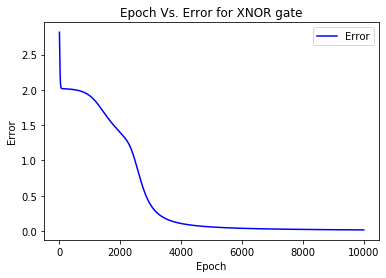

[{'weights': [6.769986257314388, 6.7213422762373405, -3.0004156073163517], 'output': 0.9999722129629208, 'delta': -7.482364566101588e-07}, {'weights': [4.719025389582753, 4.709030291073098, -7.219947037781053], 'output': 0.9009061288126796, 'delta': 0.0025839031526145965}]
[{'weights': [7.148845278513181, -7.683522711804725, -3.2937243432074244], 'output': 0.044502858089121654, 'delta': -0.0018923662728170098}, {'weights': [-7.160911232146209, 7.69783445624834, 3.2989217276623375], 'output': 0.9557529019405466, 'delta': 0.0018711784664828693}]

------- TEST ------

Expected=1, Got=1
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1


In [9]:
dataset = [[0,0,1],
           [0,1,0],
           [1,0,0],
           [1,1,1]
            ]
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.1, 10000, n_outputs)
for layer in network:
    print(layer)

print("\n------- TEST ------\n")
for row in dataset:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))